<a href="https://colab.research.google.com/github/dhsprojects/advancepython/blob/master/large_problem_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the libary

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#loading the dataset

df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#checking the datatypes
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
#using one-hot encoder to convert the numeric data
df = pd.get_dummies(df)
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
#seperate x and y
x = df.drop(["charges"],axis=1)
y = df["charges"]
x.shape,y.shape

((1338, 11), (1338,))

In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [ ]:
len(x),len(x_train),len(x_test)

(1338, 1070, 268)

In [ ]:
0.2*1338


267.6

In [ ]:
#model1

# set random 
tf.random.set_seed(42)

#create input and dense layer
model1 = tf.keras.Sequential(
    tf.keras.layers.Dense(1),
)

#compile the model
model1.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])

#fitting the model
model1.fit(x_train,y_train,epochs=5)

Epoch 1/5
34/34 [==============================] - 1s 892us/step - loss: 12936.5752 - mae: 12936.5752
Epoch 2/5
34/34 [==============================] - 0s 973us/step - loss: 12091.7373 - mae: 12091.7373
Epoch 3/5
34/34 [==============================] - 0s 799us/step - loss: 11264.6709 - mae: 11264.6709
Epoch 4/5
34/34 [==============================] - 0s 835us/step - loss: 10507.7217 - mae: 10507.7217
Epoch 5/5
34/34 [==============================] - 0s 843us/step - loss: 9859.0068 - mae: 9859.0068


In [ ]:
#eluation the model
model1.evaluate(x_train,y_train)

34/34 [==============================] - 0s 799us/step - loss: 9560.3418 - mae: 9560.3418


[9560.341796875, 9560.341796875]

In [ ]:
#test the model
def mae(y_true,y_pred):
  mae = tf.losses.mean_absolute_error(y_true,y_pred)
  return mae

def mse(y_true,y_pred):
  mse = tf.losses.mean_squared_error(y_true,y_pred)
  return mse

In [ ]:
#predict the model
y_pred = model1.predict(x_test)
y_pred = y_pred.reshape(268,)
y_pred.shape

(268,)

In [ ]:
#evaluate model1
mae1 = mae(y_true = y_test, y_pred=y_pred)

In [ ]:
mse1 = mse(y_true = y_test, y_pred=y_pred)

In [ ]:
mae,mse

(<function __main__.mae>, <function __main__.mse>)

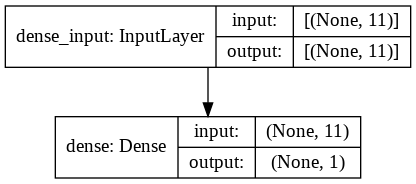

In [ ]:
#model1 summary
from tensorflow.keras.utils import plot_model
plot_model(model = model1,show_shapes=True)
#model1.summary()

In [ ]:
x_train.dtypes

age                   int64
bmi                 float64
children              int64
sex_female            uint8
sex_male              uint8
smoker_no             uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_train)
#x_train = scaler.transform(x_train)

In [ ]:
#model2
tf.random.set_seed(42)

#input and dense layer for model2
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(10)), 
model2.add(tf.keras.layers.Dense(1))

#compile the model
model2.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['mae'])

#fitting the model
model2.fit(x = x_train,y = y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13342.9727 - mae: 13342.9727
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13329.9717 - mae: 13329.9717
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13315.9346 - mae: 13315.9346
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13300.0146 - mae: 13300.0146
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13281.5713 - mae: 13281.5713
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13260.0322 - mae: 13260.0322
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 13235.2822 - mae: 13235.2822
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 13207.1514 - mae: 13207.1514
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 13175.4482 - mae: 13175.4482
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 13140.17

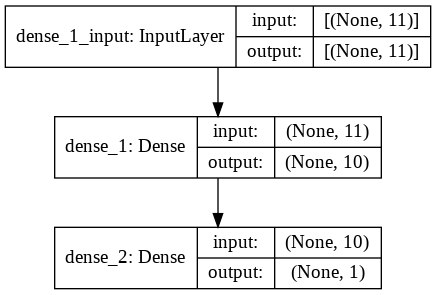

In [ ]:
plot_model(model = model2,show_shapes=True)

In [ ]:
model2.evaluate(x_train,y_train)

34/34 [==============================] - 0s 1ms/step - loss: 7396.7065 - mae: 7396.7065


[7396.70654296875, 7396.70654296875]

In [ ]:
y_pred = model2.predict(x_test)

In [ ]:
y_pred

array([[ 8914.092 ],
       [ 8015.735 ],
       [11353.143 ],
       [ 9191.363 ],
       [ 6113.6616],
       [ 9156.995 ],
       [ 5084.2476],
       [12387.981 ],
       [ 5721.296 ],
       [ 9872.878 ],
       [ 7073.6943],
       [ 8932.28  ],
       [ 7185.132 ],
       [10948.375 ],
       [12257.247 ],
       [10619.192 ],
       [11177.013 ],
       [10276.32  ],
       [ 9200.207 ],
       [ 8671.192 ],
       [ 6528.1826],
       [ 9374.243 ],
       [ 5863.45  ],
       [ 7236.1743],
       [ 9945.413 ],
       [10601.075 ],
       [11578.404 ],
       [ 7239.039 ],
       [ 9313.893 ],
       [ 5722.047 ],
       [ 8882.144 ],
       [10880.563 ],
       [ 6586.985 ],
       [ 6563.414 ],
       [ 6828.312 ],
       [10170.977 ],
       [ 5827.584 ],
       [ 8991.856 ],
       [ 9652.876 ],
       [ 8724.032 ],
       [ 6240.6733],
       [ 6471.3486],
       [11249.883 ],
       [10488.531 ],
       [ 8428.922 ],
       [10789.515 ],
       [ 6688.617 ],
       [ 6348

In [ ]:
y_pred = y_pred.reshape(268,)

In [ ]:
mae2 = mae(y_test,y_pred)

In [ ]:
mae2

<tf.Tensor: shape=(268,), dtype=float32, numpy=
array([ 8917.143 ,  9917.038 , 17240.477 ,  8997.204 , 12128.129 ,
        9583.072 , 13267.217 ,  8610.277 , 11518.857 ,  8795.009 ,
       13190.177 ,  9248.194 , 10636.489 , 16362.267 , 17485.982 ,
       16070.608 ,  8620.955 , 15878.074 ,  9039.715 , 14583.382 ,
       11171.672 ,  9155.511 , 13056.56  , 10649.0205,  8732.999 ,
        8619.958 ,  8595.072 , 10419.611 ,  8802.057 , 12970.163 ,
        9180.526 ,  8629.4   , 11750.607 , 10747.28  , 11526.579 ,
        8787.552 , 12555.706 ,  9273.295 , 15710.56  , 14292.427 ,
       11585.334 , 11824.339 ,  8615.7705,  8679.177 ,  9732.864 ,
        8655.852 , 11302.107 , 11456.075 , 15564.567 ,  9800.531 ,
        8603.753 , 12758.239 ,  8990.671 , 12748.712 ,  8644.348 ,
        8661.718 , 10724.75  , 14037.189 ,  8629.573 ,  8630.689 ,
        8590.023 ,  9538.389 ,  8601.759 ,  9296.159 ,  8674.48  ,
       11053.469 , 12472.96  ,  8737.774 , 11877.457 , 11652.324 ,
        9118.8

In [ ]:
mse2 = mse(y_test,y_pred)

In [ ]:
#noe we creating model 3
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(100)),
model3.add(tf.keras.layers.Dense(100)),
model3.add(tf.keras.layers.Dense(1))

#compile the model
model3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics = ['mae'])

#fit the model
model3.fit(x_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 9752.1475 - mae: 9752.1475
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7384.1880 - mae: 7384.1880
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 6965.8472 - mae: 6965.8472
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 6533.5068 - mae: 6533.5068
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 6348.6348 - mae: 6348.6348
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 6053.9512 - mae: 6053.9512
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 5633.7788 - mae: 5633.7788
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 4959.6353 - mae: 4959.6353
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 4048.0388 - mae: 4048.0388
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 3843.0366 - mae: 3843.0366

In [ ]:
#evaluate the model3
model3.evaluate(x_train,y_train)

34/34 [==============================] - 0s 950us/step - loss: 3543.0168 - mae: 3543.0168


[3543.016845703125, 3543.016845703125]

In [ ]:
#predict the model3
y_pred = model3.predict(x_test)

In [ ]:
#reshape y for checking error
y_pred = y_pred.reshape(268,)

In [ ]:
mae3 = mae(y_test,y_pred)

In [ ]:
mse3 = mse(y_test,y_pred)

In [ ]:
mae3,mse3

(<tf.Tensor: shape=(), dtype=float32, numpy=3210.9714>,
 <tf.Tensor: shape=(), dtype=float32, numpy=42239700.0>)

In [ ]:
#creating model 4
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Dense(100)),
model4.add(tf.keras.layers.Dense(1))

#compile the model
model4.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
               metrics = ['mae'])

#fitting the model
model4.fit(x_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 969us/step - loss: 8541.6094 - mae: 8541.6094
Epoch 2/100
34/34 [==============================] - 0s 928us/step - loss: 7867.9897 - mae: 7867.9897
Epoch 3/100
34/34 [==============================] - 0s 900us/step - loss: 7607.0806 - mae: 7607.0806
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.4629 - mae: 7698.4629
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7729.1992 - mae: 7729.1992
Epoch 6/100
34/34 [==============================] - 0s 977us/step - loss: 7586.7739 - mae: 7586.7739
Epoch 7/100
34/34 [==============================] - 0s 924us/step - loss: 7594.7490 - mae: 7594.7490
Epoch 8/100
34/34 [==============================] - 0s 926us/step - loss: 7799.0000 - mae: 7799.0000
Epoch 9/100
34/34 [==============================] - 0s 946us/step - loss: 7607.6709 - mae: 7607.6709
Epoch 10/100
34/34 [==============================] - 0s 940us/step - loss: 7742.1055 

In [ ]:
model_result = [["model1",mae1.numpy(),mse1.numpy()],
                ["model2",mae2.numpy(),mse2.numpy()],
                ["model3",mae3.numpy(),mse3.numpy()]]

all_result = pd.DataFrame(model_result,columns=["model","mae","mse"])
all_result

,model,mae,mse
0,model1,9241.274414,227512000.0
1,model2,7539.951172,157949344.0
2,model3,3210.971436,42239700.0


In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               1200      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.save("fit_model")

INFO:tensorflow:Assets written to: fit_model/assets


In [ ]:
model3.save("fit_model1.h5")

In [ ]:
#load the save model
loaded_saved_model = tf.keras.models.load_model("fit_model")

In [ ]:
loaded_saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               1200      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loaded_h5_predicted_model = tf.keras.models.load_model("fit_model.h5")
loaded_h5_predicted_model.summary()

OSError: ignored

In [ ]:
#download the model from colab
from google.colab import files
files.download("fit_model.h5")

In [ ]:
#save the model in google drive
!cp /content/fit_model.h5 /content/drive/MyDrive/Classroom

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls /content/drive/MyDrive/Classroom

 fit_model.h5  'ssss dasd'


##preprocessing data(normalization and standardization)

In terms of scaling values, neural network tend to perfer normalization 

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare our data, we can borrow few classes from scikit-learn

In [ ]:
#Libaries
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler

#Create the column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown= "ignore"),["sex","smoker","region"])
)

#create X & y

x = df.drop("charges",axis=1)
y = df["charges"]



In [ ]:
from sklearn.model_selection import train_test_split

#split the data into training and testing
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#fit the column transformer to our training data
ct.fit(x_train)

#converting the training and test data into normalization and onehotencoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)


In [ ]:
#before normization and onehotencoder
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

Now our data been normalized and onehotencoder. Let build our model

In [ ]:
#set random seed
tf.random.set_seed(42)

#create neural network
model5 = tf.keras.Sequential()
model5.add(tf.keras.layers.Dense(100)),
model5.add(tf.keras.layers.Dense(100)),
model5.add(tf.keras.layers.Dense(1))

#compile the model
model5.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics = ["mae"])

#fit the model
model5.fit(x_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 12637.2021 - mae: 12637.2021
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 8120.7441 - mae: 8120.7441
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7099.0166 - mae: 7099.0166
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 5560.9072 - mae: 5560.9072
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 3890.3486 - mae: 3890.3486
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 3656.1345 - mae: 3656.1345
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 3625.7568 - mae: 3625.7568
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 3625.8984 - mae: 3625.8984
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 3570.4048 - mae: 3570.4048
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 3551.8513 - mae: 3551.85

In [ ]:
#evaluate the model
model5.evaluate(x_train_normal,y_train)

34/34 [==============================] - 0s 958us/step - loss: 3474.3142 - mae: 3474.3142


[3474.314208984375, 3474.314208984375]

In [ ]:
#test the model
y_pred = model5.predict(x_test_normal)

In [ ]:
y_pred.shape

(268, 1)

In [ ]:
y_pred = y_pred.reshape(268,)

In [ ]:
mae5 = mae(y_test,y_pred)

In [ ]:
mae5

<tf.Tensor: shape=(), dtype=float32, numpy=3167.9775>

In [ ]:
mse5 = mse(y_test,y_pred)

In [ ]:
mse5

<tf.Tensor: shape=(), dtype=float32, numpy=43189836.0>

compare with same model without normalization

In [ ]:
#mae and mse
mae3,mse3

(<tf.Tensor: shape=(), dtype=float32, numpy=3210.9714>,
 <tf.Tensor: shape=(), dtype=float32, numpy=42239700.0>)